In [3]:
!pip install hmmlearn

In [4]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from hmmlearn.hmm import GaussianHMM
%matplotlib inline
sns.set()
     

In [13]:
with open('tom_1.txt', 'r', encoding='utf-8',) as f:
    text = f.read().lower()
    text = re.sub('[^а-я]',' ', text)

In [14]:
russian = ' абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(russian)}

probabilities = np.zeros((len(russian), len(russian)))

for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

df = pd.DataFrame(probabilities, index=(c for c in russian), columns=(c for c in russian))

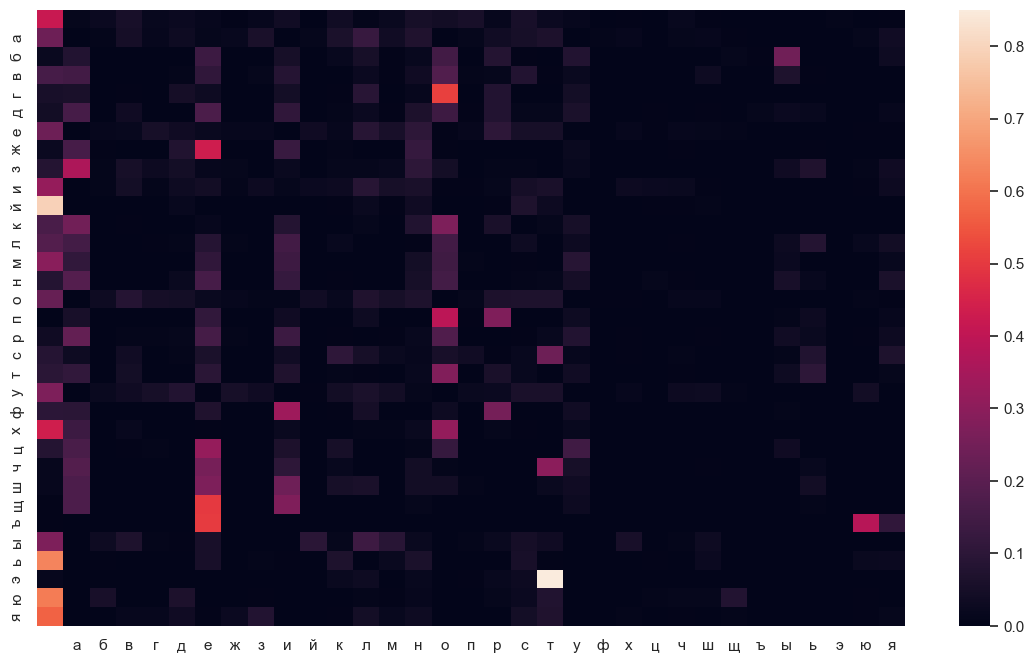

In [17]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [18]:
start = POS['п']
end = POS['р']
result =0
count = 0
prior = 1. / len(russian)
for c in russian[1:]:
  for d in russian[1:]:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end] 
    if proba > 0:
        result += proba
        count += 1

print(f'Вероятность слова из 4 букв {result}, всего вариантов слов {count}') 

Вероятность слова из 4 букв 0.0008512988379402289, всего вариантов слов 426


In [31]:
s = []
start = 'б'
s.append(start)
length = 8
pro = probabilities[:-1, :-1]
for i in range(length-1):
    index = POS[s[i]]
    next_char = np.random.choice(list(POS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бятымузя


In [32]:
series = pd.read_csv("../Series/weekly-closings-of-the-dowjones-.csv")['Close']
values = series.values.reshape(-1,1)
     

for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))
     

C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 -894.2620483582104
2 -894.2600700867421


C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3 -820.5552596248646
4 -778.0711679596651
5 -779.3163500755634


C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6 -735.3831611473427


C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


7 -735.9087063260761
8 -760.0821958429435


C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


9 -750.4811479107472


C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 -752.6307513997932


C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.


11 -697.2934342295068


C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Fitting a model with 194 free scalar parameters with only 162 data points will result in a degenerate solution.


12 -705.6947417050642


C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


13 -692.1905858223192


Fitting a model with 527 free scalar parameters with only 162 data points will result in a degenerate solution.
C:\Anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


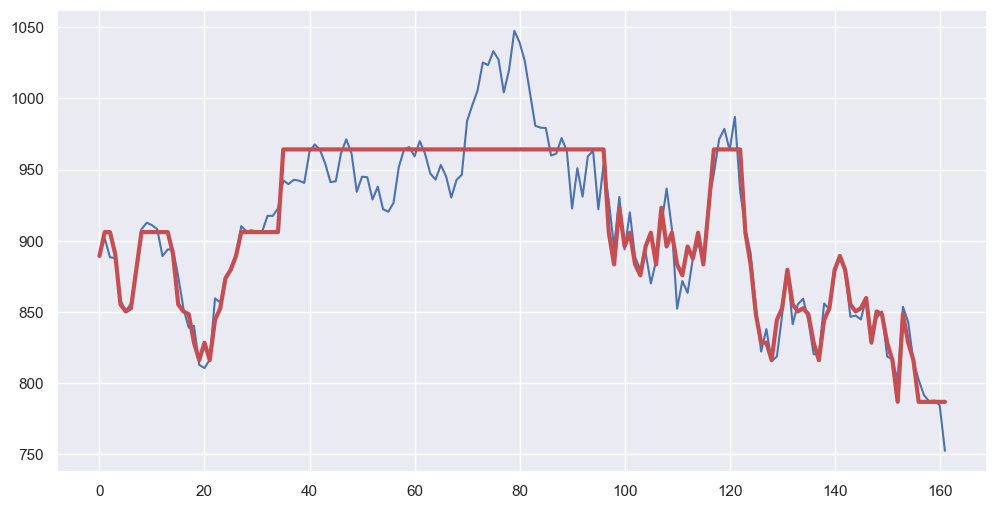

In [33]:
model = GaussianHMM(n_components=22,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3, c='r')

<Axes: >

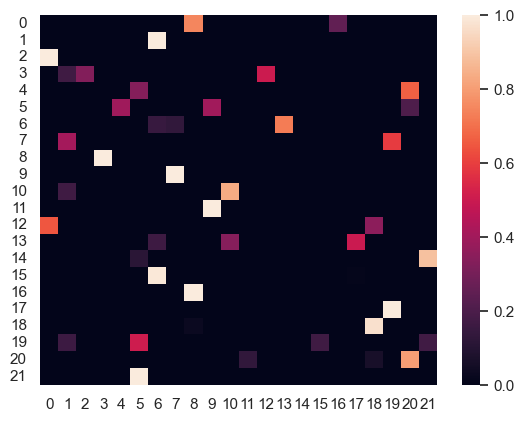

In [34]:
sns.heatmap(model.transmat_)

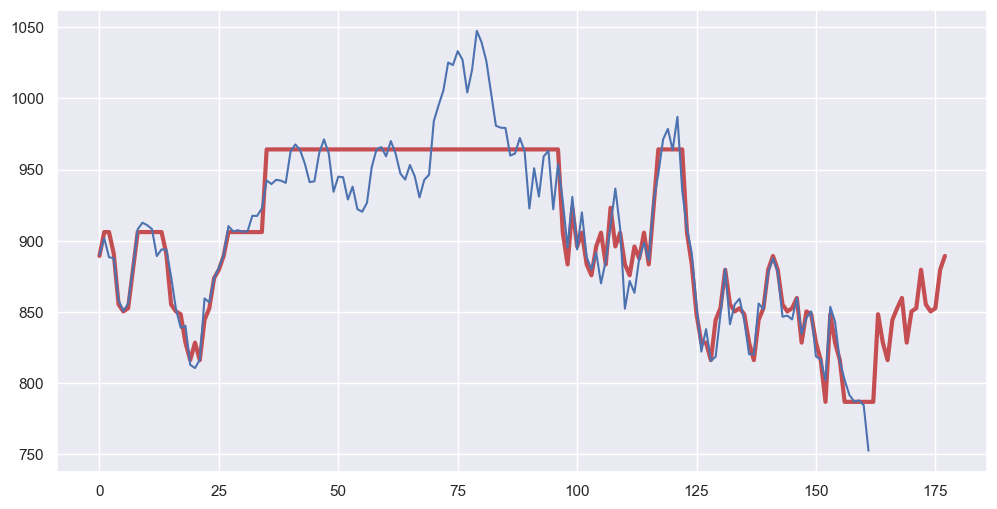

In [35]:
n = 16
prognos = means
last_label = labels[-1]
for i in range(n):
  last_label = np.random.choice(list(range(model.n_components)), p=model.transmat_[last_label])
  prognos = np.concatenate((prognos, model.means_[last_label].reshape(-1,1)))

plt.figure(figsize=(12, 6))
plt.plot(prognos, linewidth=3, c='r')
plt.plot(values)  